<a href="https://colab.research.google.com/github/nabilanurfathiaalhaq/Anaemic-Prediction-using-KNN/blob/main/Anaemic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import euclidean

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/anaemic_prediction.csv')
data

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.170845,30.945626,25.921971,6.252659,Yes
1,2,F,43.163481,30.306974,26.759843,8.578865,Yes
2,3,F,46.269997,27.315656,26.028556,9.640936,Yes
3,4,F,45.054787,30.469816,24.460797,4.794217,Yes
4,5,M,45.061884,31.218572,24.071714,8.865329,Yes
...,...,...,...,...,...,...,...
495,496,F,45.749211,27.630846,26.865636,13.760084,No
496,497,F,44.929398,30.271085,24.501944,11.588917,No
497,498,F,43.452565,29.784122,26.764283,12.460060,No
498,499,F,43.224231,29.742489,26.866944,12.074058,No


# **Data Understanding**

In [8]:
data.shape

(500, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    object 
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 27.5+ KB


In [12]:
data.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,45.030260,29.392138,25.576149,10.938374
std,144.481833,2.777042,1.585042,1.917043,2.767554
min,1.000000,38.626133,25.023080,19.495306,4.000000
25%,125.750000,43.199936,28.311988,24.877544,9.061067
50%,250.500000,44.906648,29.534431,25.982361,10.018786
75%,375.250000,46.357891,30.582852,26.754657,13.092756
max,500.000000,54.776064,32.526455,29.956341,16.508313


In [13]:
data.nunique()

,0
Number,500
Sex,4
%Red Pixel,500
%Green pixel,500
%Blue pixel,500
Hb,464
Anaemic,2


In [14]:
data.isna().sum()

,0
Number,0
Sex,0
%Red Pixel,0
%Green pixel,0
%Blue pixel,0
Hb,0
Anaemic,0


In [18]:
data.duplicated().sum()

np.int64(0)

In [19]:
data.columns

Index(['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic'],
      dtype='object')

array([[<Axes: title={'center': 'Number'}>,
        <Axes: title={'center': '%Red Pixel'}>],
       [<Axes: title={'center': '%Green pixel'}>,
        <Axes: title={'center': '%Blue pixel'}>],
       [<Axes: title={'center': 'Hb'}>, <Axes: >]], dtype=object)

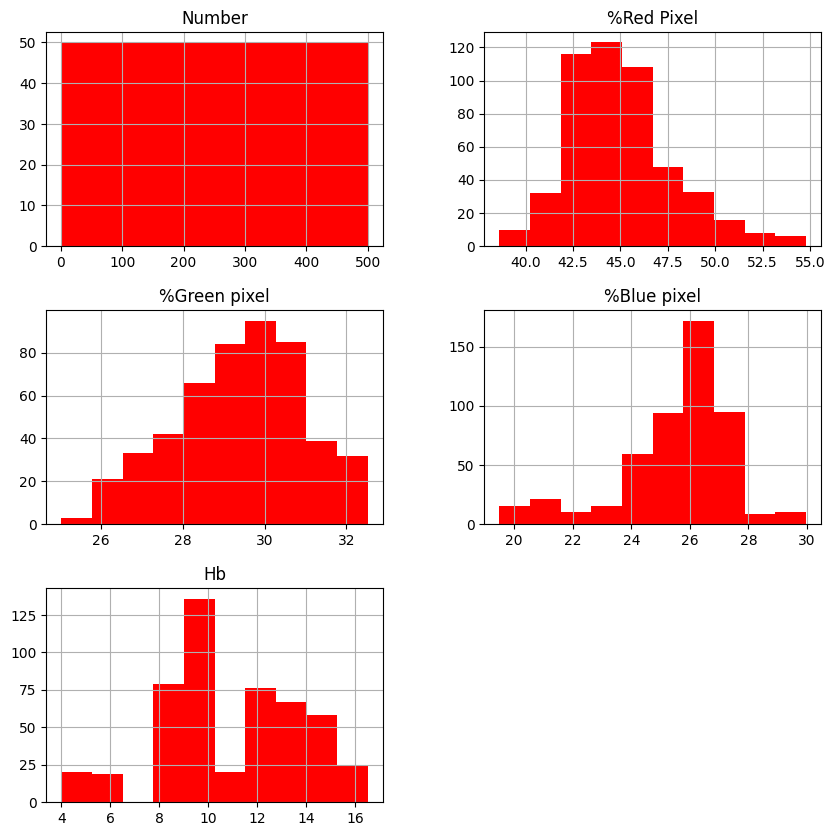

In [20]:
data.hist(figsize=(10, 10), color='red')

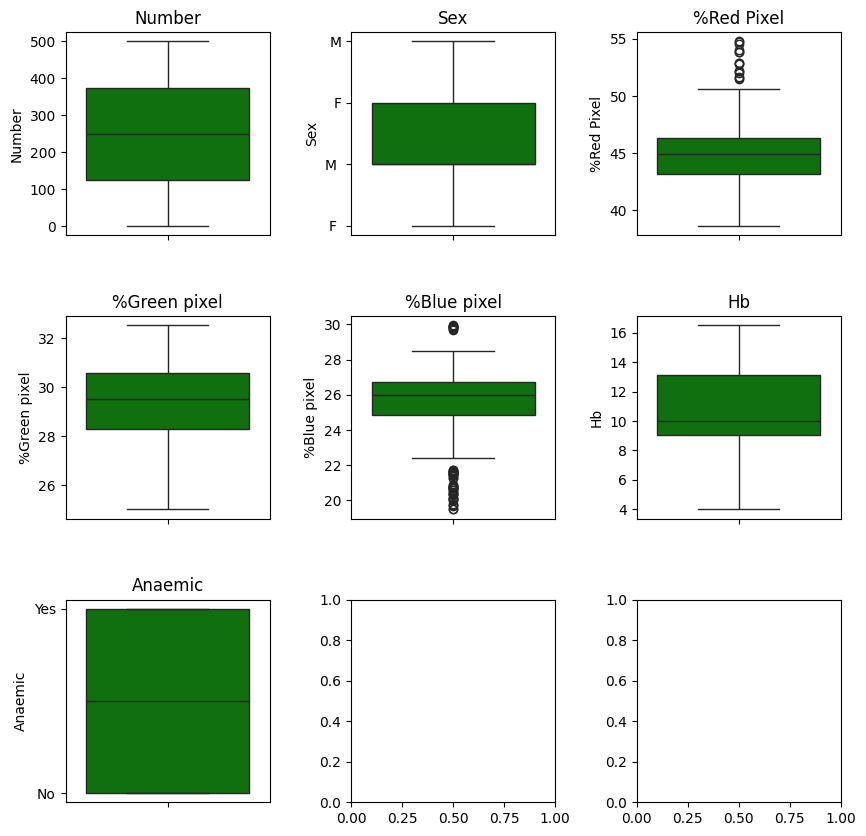

In [22]:
def boxplot(data):
  variables = ['Number', 'Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic']

  fig, axes = plt.subplots(3, 3, figsize=(10, 10))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, var in enumerate(variables):
    row, col = i // 3, i%3
    sns.boxplot(y=var, data=data, color='green', ax=axes[row, col])
    axes[row, col].set_title(var)

  plt.show()

boxplot(data)

<ipython-input-23-df26cdfba114>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anaemic', data=data, palette=['green', 'red']) #melihat dari tabel target


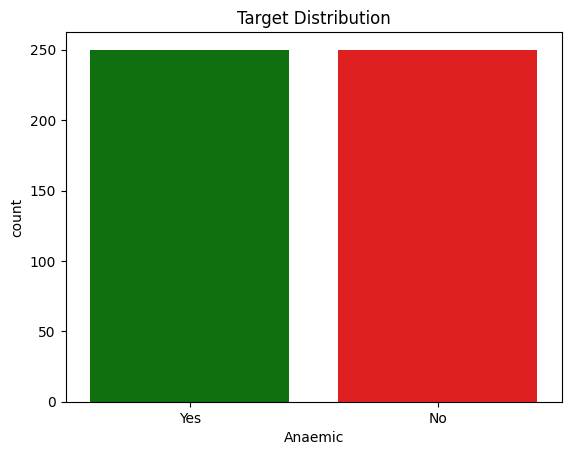

In [23]:
sns.countplot(x='Anaemic', data=data, palette=['green', 'red']) #melihat dari tabel target
plt.title('Target Distribution');

# **Data Pre-Processing**

In [24]:
le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['Anaemic'] = le.fit_transform(data['Anaemic'])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        500 non-null    int64  
 1   Sex           500 non-null    int64  
 2   %Red Pixel    500 non-null    float64
 3   %Green pixel  500 non-null    float64
 4   %Blue pixel   500 non-null    float64
 5   Hb            500 non-null    float64
 6   Anaemic       500 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 27.5 KB


<ipython-input-28-32871f354175>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anaemic', data=data, palette=['red'])
<ipython-input-28-32871f354175>:1: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Anaemic', data=data, palette=['red'])


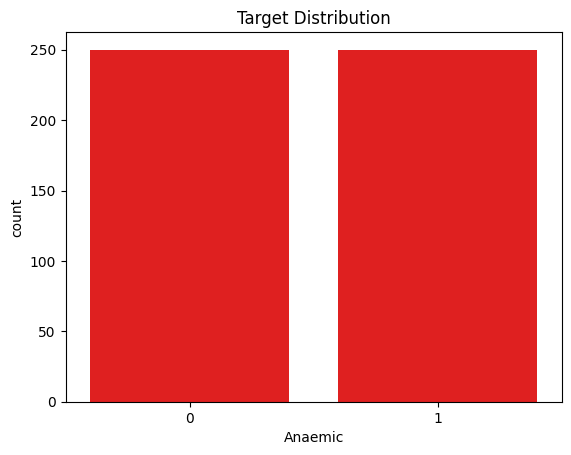

In [28]:
sns.countplot(x='Anaemic', data=data, palette=['red'])
plt.title('Target Distribution');

array([[<Axes: title={'center': 'Number'}>,
        <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': '%Red Pixel'}>],
       [<Axes: title={'center': '%Green pixel'}>,
        <Axes: title={'center': '%Blue pixel'}>,
        <Axes: title={'center': 'Hb'}>],
       [<Axes: title={'center': 'Anaemic'}>, <Axes: >, <Axes: >]],
      dtype=object)

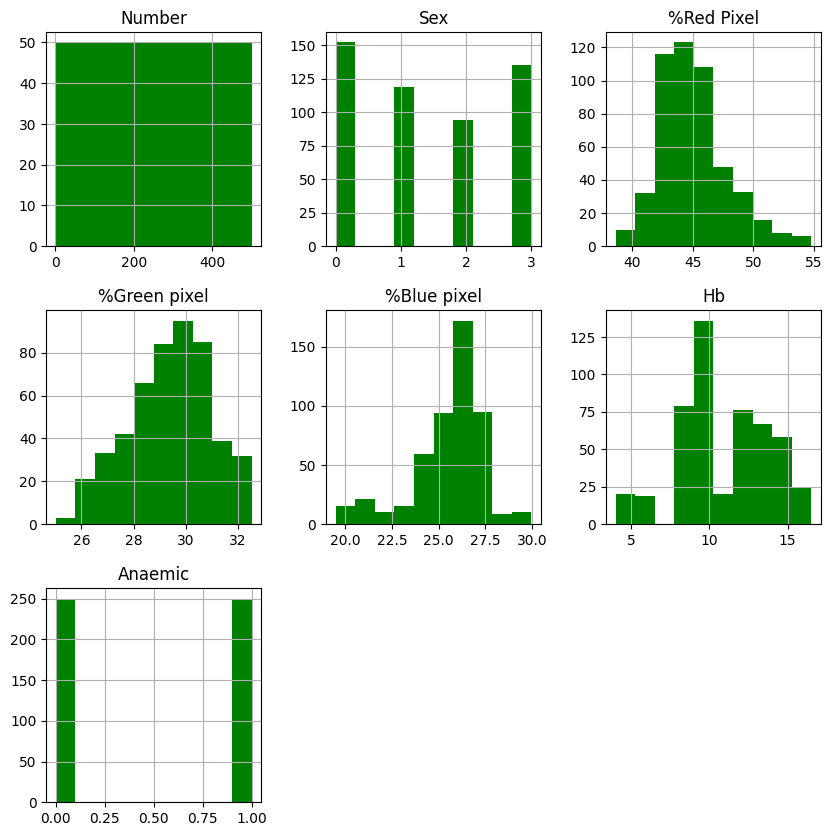

In [29]:
data.hist(figsize=(10, 10), color='green')

In [30]:
x = data.drop(columns='Anaemic')
y = data['Anaemic']

In [31]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Text(0, 0.5, 'Error Rate')

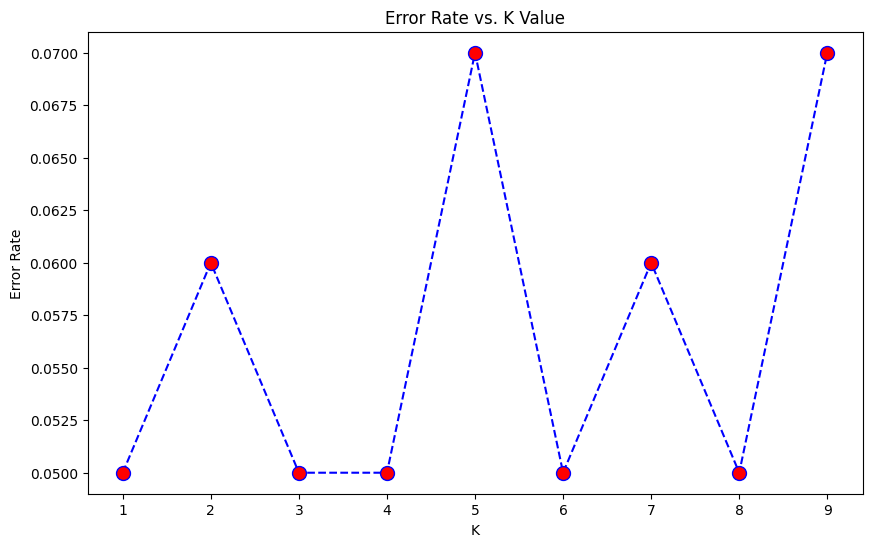

In [33]:
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color="blue", linestyle="dashed", marker="o",
         markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

# **Modelling and Evaluation**

In [34]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.88      0.97      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100



In [36]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

distances, indices = knn.kneighbors(x_test, n_neighbors=2)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nEuclidean Distances to Nearest Neighbors:")
for i in range(len(x_test)):
    print(f"Test Data Point {i}: Distances = {distances[i]}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.88      0.97      0.92        37

    accuracy                           0.94       100
   macro avg       0.93      0.95      0.94       100
weighted avg       0.94      0.94      0.94       100


Euclidean Distances to Nearest Neighbors:
Test Data Point 0: Distances = [0.47478517 0.54544775]
Test Data Point 1: Distances = [1.16278502 1.32141513]
Test Data Point 2: Distances = [0.55474175 0.57154564]
Test Data Point 3: Distances = [0.20929536 0.22701496]
Test Data Point 4: Distances = [0.19984307 0.38807054]
Test Data Point 5: Distances = [0.99716784 1.10349985]
Test Data Point 6: Distances = [0.94873893 1.04760064]
Test Data Point 7: Distances = [0.19653696 0.41961386]
Test Data Point 8: Distances = [0.84571472 0.91292672]
Test Data Point 9: Distances = [0.56348354 0.7387984 ]
Test Data Point 10: Distances = [0.74389952 0.93435693]
T

<Axes: >

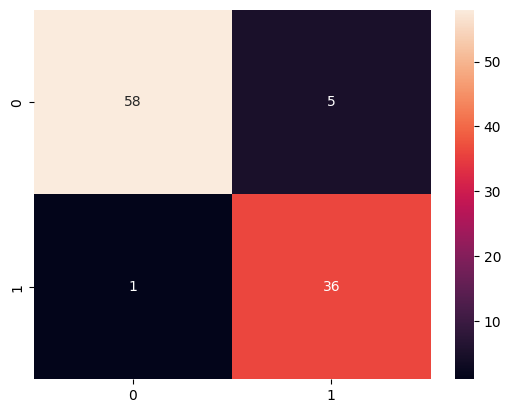

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')